## Phase 1: Understand the Data

In [8]:
import pandas as pd

df = pd.read_csv('/kaggle/input/project-data/Train.csv')
display(df.head())
display(df.info())

/tmp/ipykernel_35/2202392906.py:3: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/project-data/Train.csv')


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   saledate                  401125 non-null  object 
 10  fiModelDesc               401125 non-null  object 
 11  fiBaseModel               401125 non-null  object 
 12  fiSecondaryDesc           263934 non-null  object 
 13  fiModelSeries             56908 non-null   o

None

In [9]:
display(df.isnull().sum())

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension     

In [10]:
display(df.describe())

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.639422e+06,24000.000000,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.242707e+06,40000.000000,1.468067e+06,8724.000000,136.000000,4.000000,2000.000000,3.025000e+03
max,6.333342e+06,142000.000000,2.486330e+06,37198.000000,172.000000,99.000000,2013.000000,2.483300e+06


### Analyzing the percentage of missing values per column to determine which columns have a high proportion of missing data.

In [11]:
missing_percentages = (df.isnull().sum() / len(df)) * 100
display(missing_percentages.sort_values(ascending=False))

Pushblock                   93.712932
Tip_Control                 93.712932
Enclosure_Type              93.712932
Engine_Horsepower           93.712932
Blade_Extension             93.712932
Blade_Width                 93.712932
Scarifier                   93.710190
Grouser_Tracks              89.189903
Hydraulics_Flow             89.189903
Coupler_System              89.165971
fiModelSeries               85.812901
Steering_Controls           82.706388
Differential_Type           82.695918
UsageBand                   82.639078
fiModelDescriptor           82.070676
Backhoe_Mounting            80.387161
Stick                       80.271985
Pad_Type                    80.271985
Turbocharged                80.271985
Blade_Type                  80.097725
Travel_Controls             80.097476
Tire_Size                   76.386912
Grouser_Type                75.281271
Track_Type                  75.281271
Stick_Length                75.265067
Pattern_Changer             75.265067
Thumb       

In [12]:
# Drop columns with more than 70% missing values
cols_to_drop = missing_percentages[missing_percentages > 70].index
df = df.drop(columns=cols_to_drop)

# Impute numerical columns with the median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())

# Impute categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])
        
display(df.isnull().sum())

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
saledate                    0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Enclosure                   0
Forks                       0
Ride_Control                0
Transmission                0
Hydraulics                  0
Coupler                     0
dtype: int64

In [13]:
df['saledate'] = pd.to_datetime(df['saledate'])
display(df.dtypes)

display(df.head())
display(df.info())

SalesID                              int64
SalePrice                            int64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Enclosure                           object
Forks                               object
Ride_Control                        object
Transmission                        object
Hydraulics                          object
Coupler                             object
dtype: obje

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saledate,fiModelDesc,...,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Enclosure,Forks,Ride_Control,Transmission,Hydraulics,Coupler
0,1139246,66000,999089,3157,121,3.0,2004,68.0,2006-11-16,521D,...,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,EROPS w AC,None or Unspecified,None or Unspecified,Standard,2 Valve,None or Unspecified
1,1139248,57000,117657,77,121,3.0,1996,4640.0,2004-03-26,950FII,...,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,EROPS w AC,None or Unspecified,None or Unspecified,Standard,2 Valve,None or Unspecified
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,2004-02-26,226,...,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,OROPS,None or Unspecified,No,Standard,Auxiliary,None or Unspecified
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,2011-05-19,PC120-6E,...,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,EROPS w AC,None or Unspecified,No,Standard,2 Valve,None or Unspecified
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,2009-07-23,S175,...,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,EROPS,None or Unspecified,No,Standard,Auxiliary,None or Unspecified


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   401125 non-null  int64         
 1   SalePrice                 401125 non-null  int64         
 2   MachineID                 401125 non-null  int64         
 3   ModelID                   401125 non-null  int64         
 4   datasource                401125 non-null  int64         
 5   auctioneerID              401125 non-null  float64       
 6   YearMade                  401125 non-null  int64         
 7   MachineHoursCurrentMeter  401125 non-null  float64       
 8   saledate                  401125 non-null  datetime64[ns]
 9   fiModelDesc               401125 non-null  object        
 10  fiBaseModel               401125 non-null  object        
 11  fiSecondaryDesc           401125 non-null  object        
 12  Pr

None

,YearMade,MachineHoursCurrentMeter
count,401125.000000,4.011250e+05
mean,1899.156901,1.230726e+03
std,291.797469,1.654290e+04
min,1000.000000,0.000000e+00
25%,1985.000000,0.000000e+00
50%,1995.000000,0.000000e+00
75%,2000.000000,0.000000e+00
max,2013.000000,2.483300e+06


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


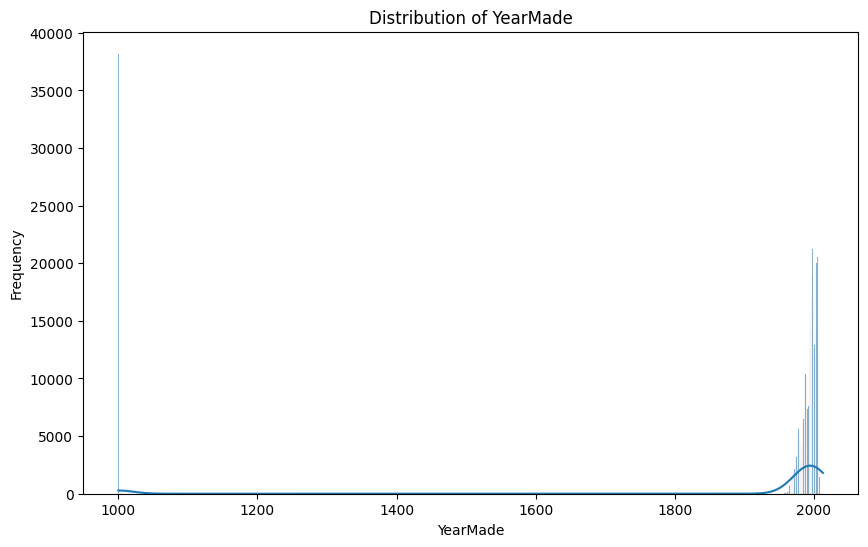

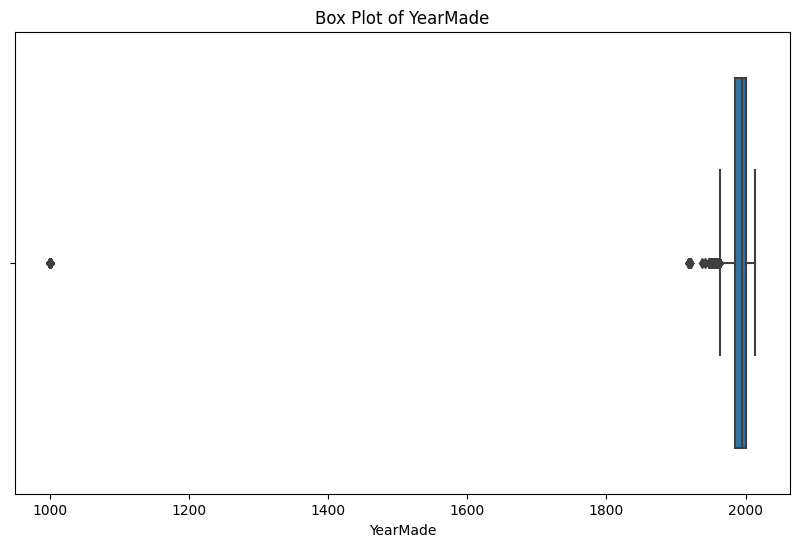

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


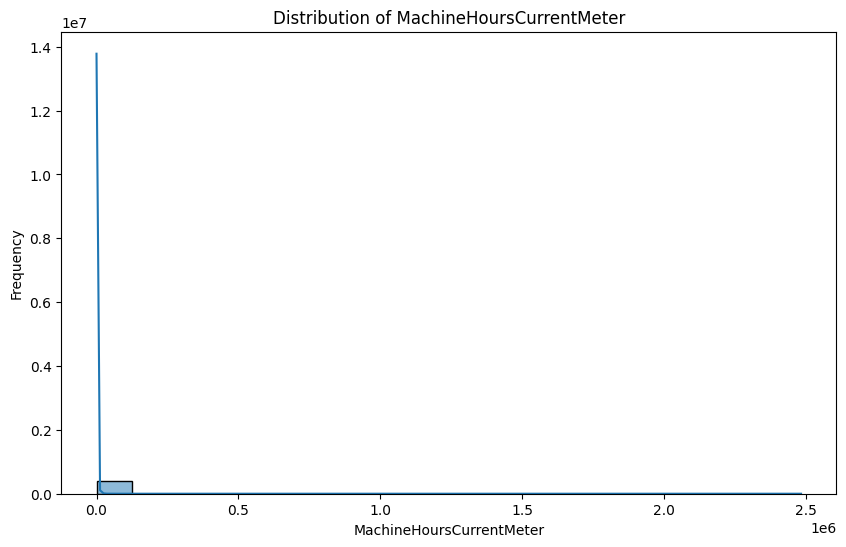

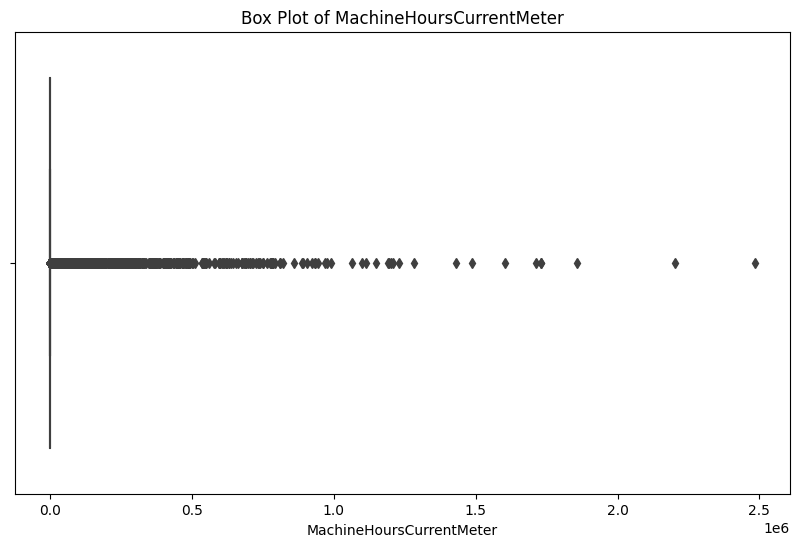

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
display(df[['YearMade', 'MachineHoursCurrentMeter']].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['YearMade'], kde=True)
plt.title('Distribution of YearMade')
plt.xlabel('YearMade')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['YearMade'])
plt.title('Box Plot of YearMade')
plt.xlabel('YearMade')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['MachineHoursCurrentMeter'], kde=True)
plt.title('Distribution of MachineHoursCurrentMeter')
plt.xlabel('MachineHoursCurrentMeter')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['MachineHoursCurrentMeter'])
plt.title('Box Plot of MachineHoursCurrentMeter')
plt.xlabel('MachineHoursCurrentMeter')
plt.show()

The year 1000 is clearly an incorrect value based on the data so it is removed. In the column 'MahineHoursCurrentMeter, capping the values to 99th percentile due to presence of a number of 0 values present and removing them without having their influence onn valid data points.

77599     1919
77592     1919
77593     1919
77596     1919
77598     1919
77534     1919
77541     1919
77542     1919
77546     1919
77565     1919
77590     1919
77600     1919
77601     1919
77604     1919
77609     1919
77613     1919
77614     1919
241180    1919
241189    1919
129239    1919
Name: YearMade, dtype: int64


12793.829999999958

,YearMade,MachineHoursCurrentMeter
count,362940.000000,362940.000000
mean,1993.757403,745.145476
std,9.684227,2180.685847
min,1919.000000,0.000000
25%,1988.000000,0.000000
50%,1996.000000,0.000000
75%,2001.000000,0.000000
max,2013.000000,12793.830000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


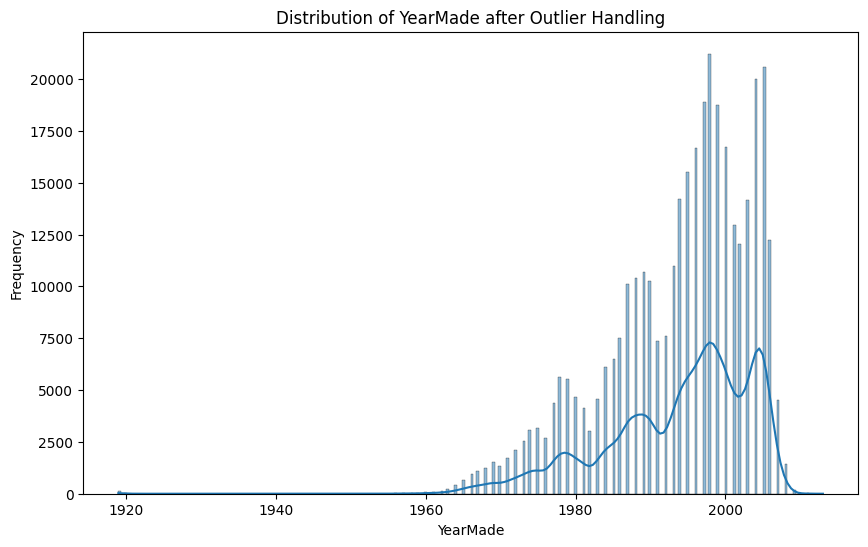

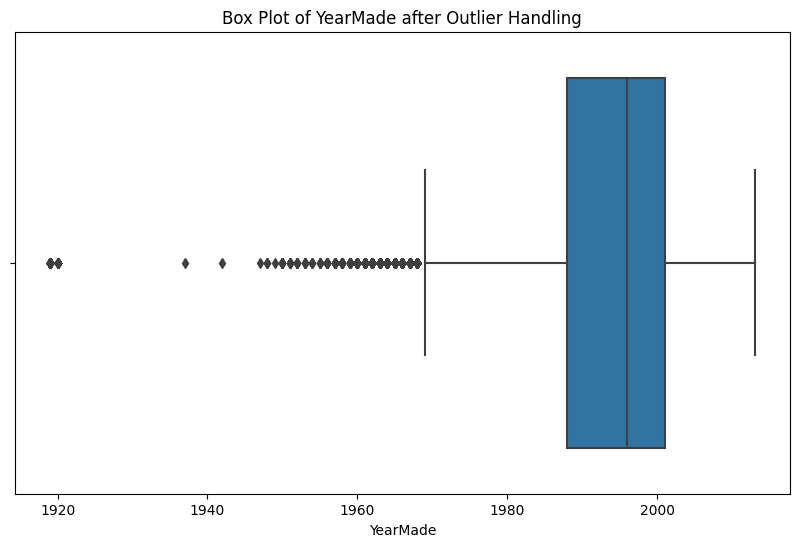

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


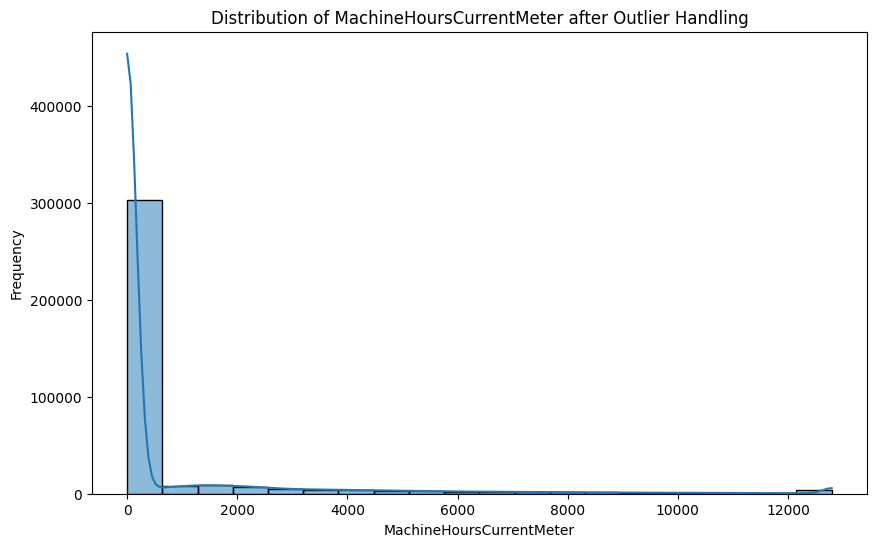

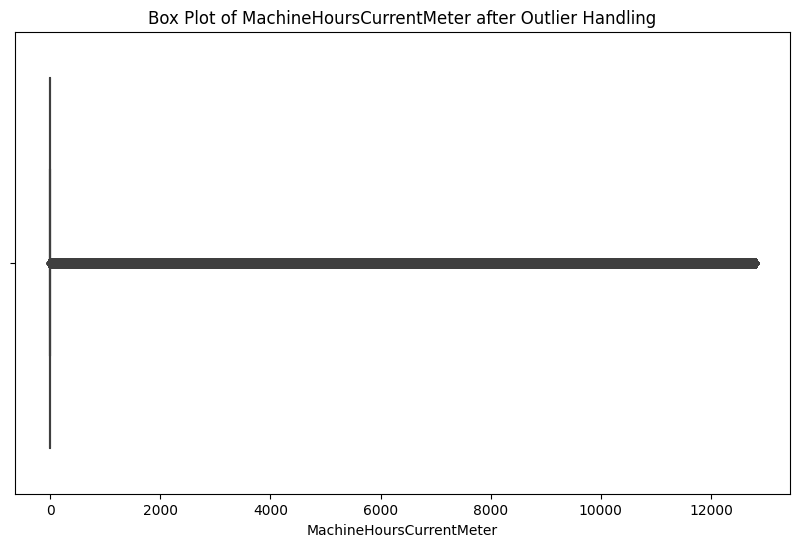

In [15]:
df = df[df['YearMade'] != 1000]
print(df['YearMade'].sort_values().head(20))

upper_limit = df['MachineHoursCurrentMeter'].quantile(0.99)
display(upper_limit)
df['MachineHoursCurrentMeter'] = df['MachineHoursCurrentMeter'].clip(upper=upper_limit)

display(df[['YearMade', 'MachineHoursCurrentMeter']].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['YearMade'], kde=True)
plt.title('Distribution of YearMade after Outlier Handling')
plt.xlabel('YearMade')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['YearMade'])
plt.title('Box Plot of YearMade after Outlier Handling')
plt.xlabel('YearMade')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['MachineHoursCurrentMeter'], kde=True)
plt.title('Distribution of MachineHoursCurrentMeter after Outlier Handling')
plt.xlabel('MachineHoursCurrentMeter')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['MachineHoursCurrentMeter'])
plt.title('Box Plot of MachineHoursCurrentMeter after Outlier Handling')
plt.xlabel('MachineHoursCurrentMeter')
plt.show()

In [16]:
df['saledate'] = pd.to_datetime(df['saledate'])
df['saleYear'] = df['saledate'].dt.year
df['saleMonth'] = df['saledate'].dt.month
df['saleDay'] = df['saledate'].dt.day
display(df.head())

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saledate,fiModelDesc,...,ProductGroupDesc,Enclosure,Forks,Ride_Control,Transmission,Hydraulics,Coupler,saleYear,saleMonth,saleDay
0,1139246,66000,999089,3157,121,3.0,2004,68.0,2006-11-16,521D,...,Wheel Loader,EROPS w AC,None or Unspecified,None or Unspecified,Standard,2 Valve,None or Unspecified,2006,11,16
1,1139248,57000,117657,77,121,3.0,1996,4640.0,2004-03-26,950FII,...,Wheel Loader,EROPS w AC,None or Unspecified,None or Unspecified,Standard,2 Valve,None or Unspecified,2004,3,26
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,2004-02-26,226,...,Skid Steer Loaders,OROPS,None or Unspecified,No,Standard,Auxiliary,None or Unspecified,2004,2,26
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,2011-05-19,PC120-6E,...,Track Excavators,EROPS w AC,None or Unspecified,No,Standard,2 Valve,None or Unspecified,2011,5,19
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,2009-07-23,S175,...,Skid Steer Loaders,EROPS,None or Unspecified,No,Standard,Auxiliary,None or Unspecified,2009,7,23


## Convert categorical variables

Convert categorical features into numerical representations using appropriate encoding techniques.

In [17]:
categorical_cols = df.select_dtypes(include=['object']).columns

df = pd.get_dummies(df, columns=categorical_cols, dummy_na=False)

display(df.dtypes)
display(df.head())

SalesID                           int64
SalePrice                         int64
MachineID                         int64
ModelID                           int64
datasource                        int64
                                  ...  
Hydraulics_None or Unspecified     bool
Hydraulics_Standard                bool
Coupler_Hydraulic                  bool
Coupler_Manual                     bool
Coupler_None or Unspecified        bool
Length: 6715, dtype: object

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saledate,saleYear,...,Hydraulics_Base + 2 Function,Hydraulics_Base + 3 Function,Hydraulics_Base + 4 Function,Hydraulics_Base + 5 Function,Hydraulics_Base + 6 Function,Hydraulics_None or Unspecified,Hydraulics_Standard,Coupler_Hydraulic,Coupler_Manual,Coupler_None or Unspecified
0,1139246,66000,999089,3157,121,3.0,2004,68.0,2006-11-16,2006,...,False,False,False,False,False,False,False,False,False,True
1,1139248,57000,117657,77,121,3.0,1996,4640.0,2004-03-26,2004,...,False,False,False,False,False,False,False,False,False,True
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,2004-02-26,2004,...,False,False,False,False,False,False,False,False,False,True
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,2011-05-19,2011,...,False,False,False,False,False,False,False,False,False,True
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,2009-07-23,2009,...,False,False,False,False,False,False,False,False,False,True


In [18]:
y = df['SalePrice']
X = df.drop('SalePrice', axis=1)
display(X.head())
display(y.head())

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saledate,saleYear,saleMonth,...,Hydraulics_Base + 2 Function,Hydraulics_Base + 3 Function,Hydraulics_Base + 4 Function,Hydraulics_Base + 5 Function,Hydraulics_Base + 6 Function,Hydraulics_None or Unspecified,Hydraulics_Standard,Coupler_Hydraulic,Coupler_Manual,Coupler_None or Unspecified
0,1139246,999089,3157,121,3.0,2004,68.0,2006-11-16,2006,11,...,False,False,False,False,False,False,False,False,False,True
1,1139248,117657,77,121,3.0,1996,4640.0,2004-03-26,2004,3,...,False,False,False,False,False,False,False,False,False,True
2,1139249,434808,7009,121,3.0,2001,2838.0,2004-02-26,2004,2,...,False,False,False,False,False,False,False,False,False,True
3,1139251,1026470,332,121,3.0,2001,3486.0,2011-05-19,2011,5,...,False,False,False,False,False,False,False,False,False,True
4,1139253,1057373,17311,121,3.0,2007,722.0,2009-07-23,2009,7,...,False,False,False,False,False,False,False,False,False,True


0    66000
1    57000
2    10000
3    38500
4    11000
Name: SalePrice, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_valid:", X_valid.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_valid:", y_valid.shape)

Shape of X_train: (290352, 6714)
Shape of X_valid: (72588, 6714)
Shape of y_train: (290352,)
Shape of y_valid: (72588,)


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
import numpy as np

if 'saledate' in X_train.columns:
    X_train = X_train.drop('saledate', axis=1)
if 'saledate' in X_valid.columns:
    X_valid = X_valid.drop('saledate', axis=1)

model = RandomForestRegressor(random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

# Ensure predictions are non-negative before taking the log
y_pred = np.maximum(y_pred, 0)
rmsle = np.sqrt(mean_squared_log_error(np.log1p(y_valid), np.log1p(y_pred)))

print(f"RMSLE on the validation set: {rmsle}")

RMSLE on the validation set: 0.01851012130910223


In [21]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

y_pred_gbr = gbr_model.predict(X_valid)
y_pred_gbr = np.maximum(y_pred_gbr, 0)
rmsle_gbr = np.sqrt(mean_squared_log_error(np.log1p(y_valid), np.log1p(y_pred_gbr)))

print(f"RMSLE on the validation set (Gradient Boosting Regressor): {rmsle_gbr}")

RMSLE on the validation set (Gradient Boosting Regressor): 0.037204117708693245


In [41]:
df_test = pd.read_csv('/kaggle/input/project-data/Test.csv')
 #to compare the datasets the same columns need to be dropped from the testing data as were removed from the training datset
df_test = df_test.drop(columns=cols_to_drop)

numerical_cols_test = df_test.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols_test:
    if df_test[col].isnull().any():
        df_test[col] = df_test[col].fillna(df_test[col].median())

categorical_cols_test = df_test.select_dtypes(include=['object']).columns
for col in categorical_cols_test:
    if df_test[col].isnull().any():
        df_test[col] = df_test[col].fillna(df_test[col].mode()[0])

df_test['saledate'] = pd.to_datetime(df_test['saledate'])

df_test['saleYear'] = df_test['saledate'].dt.year
df_test['saleMonth'] = df_test['saledate'].dt.month
df_test['saleDay'] = df_test['saledate'].dt.day

df_test = df_test[df_test['YearMade'] != 1000]
upper_limit_test = df_test['MachineHoursCurrentMeter'].quantile(0.99)
df_test['MachineHoursCurrentMeter'] = df_test['MachineHoursCurrentMeter'].clip(upper=upper_limit_test)


categorical_cols_test = df_test.select_dtypes(include=['object']).columns
df_test = pd.get_dummies(df_test, columns=categorical_cols_test, dummy_na=False)

display(df_test.head())
display(df_test.info())

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saledate,saleYear,saleMonth,...,Hydraulics_Base + 1 Function,Hydraulics_Base + 2 Function,Hydraulics_Base + 3 Function,Hydraulics_Base + 4 Function,Hydraulics_Base + 5 Function,Hydraulics_Base + 6 Function,Hydraulics_Standard,Coupler_Hydraulic,Coupler_Manual,Coupler_None or Unspecified
0,1227829,1006309,3168,121,3,1999,3688.0,2012-05-03,2012,5,...,False,False,False,False,False,False,False,False,False,True
2,1227847,1031560,22805,121,3,2004,6038.0,2012-05-10,2012,5,...,False,False,False,False,False,False,False,False,False,True
3,1227848,56204,1269,121,3,2006,8940.0,2012-05-10,2012,5,...,False,False,False,False,False,False,True,False,False,True
4,1227863,1053887,22312,121,3,2005,2286.0,2012-05-10,2012,5,...,False,False,False,False,False,False,False,False,False,True
5,1227870,1068694,16747,121,3,2007,3670.0,2012-05-03,2012,5,...,False,False,False,False,False,False,False,False,False,True


<class 'pandas.core.frame.DataFrame'>
Index: 10820 entries, 0 to 12456
Columns: 2774 entries, SalesID to Coupler_None or Unspecified
dtypes: bool(2763), datetime64[ns](1), float64(1), int32(3), int64(6)
memory usage: 29.4 MB


None

In [26]:
df_test.describe()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saledate,saleYear,saleMonth,saleDay
count,1.082000e+04,1.082000e+04,10820.000000,10820.000000,10820.000000,10820.000000,10820.000000,10820,10820.0,10820.000000,10820.000000
mean,5.892043e+06,1.792687e+06,9571.336876,148.130129,11.048244,2000.452588,3659.426529,2012-08-01 13:20:23.068391680,2012.0,7.488632,17.156007
min,1.227829e+06,2.110000e+02,28.000000,121.000000,0.000000,1900.000000,0.000000,2012-05-01 00:00:00,2012.0,5.000000,1.000000
25%,6.263676e+06,1.183273e+06,3415.000000,149.000000,1.000000,1998.000000,3525.000000,2012-06-11 18:00:00,2012.0,6.000000,12.000000
50%,6.304140e+06,1.913781e+06,5857.000000,149.000000,1.000000,2003.000000,3525.000000,2012-07-25 00:00:00,2012.0,7.000000,18.000000
75%,6.468453e+06,2.471000e+06,16506.000000,149.000000,3.000000,2006.000000,3525.000000,2012-09-25 00:00:00,2012.0,9.000000,24.000000
max,6.643196e+06,2.558557e+06,36941.000000,172.000000,99.000000,2014.000000,13158.560000,2012-11-16 00:00:00,2012.0,11.000000,31.000000
std,1.327663e+06,7.602203e+05,7960.432775,13.406238,28.261650,7.806780,1615.918660,NaN,0.0,1.947210,7.882682


Now aligning the columns of the preprocessed testing dataset with that of training dataset(df) for comparison. Dropping any columns that are present in the training data and not in df and adding the extra columns in the training data from df and assigning all the values in these columns to 0.

In [43]:
train_cols = list(df.columns)
if 'SalePrice' in train_cols:
    train_cols.remove('SalePrice')

test_cols = list(df_test.columns)

# Find columns in training data not in test data and add them to test data with default value 0
missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    df_test[c] = 0

# Find columns in test data not in training data and drop them from test data
missing_in_train = set(test_cols) - set(train_cols)
df_test = df_test.drop(columns=missing_in_train)

# Ensure the order of columns in the test set is the same as in the training set
df_test = df_test[train_cols]

display(df_test.head())
display(df_test.info())

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saledate,saleYear,saleMonth,...,Hydraulics_Base + 2 Function,Hydraulics_Base + 3 Function,Hydraulics_Base + 4 Function,Hydraulics_Base + 5 Function,Hydraulics_Base + 6 Function,Hydraulics_None or Unspecified,Hydraulics_Standard,Coupler_Hydraulic,Coupler_Manual,Coupler_None or Unspecified
0,1227829,1006309,3168,121,3,1999,3688.0,2012-05-03,2012,5,...,False,False,False,False,False,0,False,False,False,True
2,1227847,1031560,22805,121,3,2004,6038.0,2012-05-10,2012,5,...,False,False,False,False,False,0,False,False,False,True
3,1227848,56204,1269,121,3,2006,8940.0,2012-05-10,2012,5,...,False,False,False,False,False,0,True,False,False,True
4,1227863,1053887,22312,121,3,2005,2286.0,2012-05-10,2012,5,...,False,False,False,False,False,0,False,False,False,True
5,1227870,1068694,16747,121,3,2007,3670.0,2012-05-03,2012,5,...,False,False,False,False,False,0,False,False,False,True


<class 'pandas.core.frame.DataFrame'>
Index: 10820 entries, 0 to 12456
Columns: 6714 entries, SalesID to Coupler_None or Unspecified
dtypes: bool(2650), datetime64[ns](1), float64(1), int32(3), int64(4059)
memory usage: 362.8 MB


None

In [45]:
if 'saledate' in df_test.columns:
    df_test = df_test.drop('saledate', axis=1)
test_predictions = model.predict(df_test)

display(test_predictions[:20])

array([15355. , 48315. , 97860. , 26325. , 31765. , 30630. , 31195. ,
       70365. , 81595. , 41950. , 41510. , 27172.5, 27707.5, 22385. ,
       45315. , 46220. , 37595. , 11086.5, 31630. , 23570. ])

In [46]:
submission_df = pd.DataFrame({
    'SalesID': df_test['SalesID'],
    'SalePrice': test_predictions
})

display(submission_df.head())

,SalesID,SalePrice
0,1227829,15355.0
2,1227847,48315.0
3,1227848,97860.0
4,1227863,26325.0
5,1227870,31765.0


In [47]:
df_median_benchmark = pd.read_csv('/kaggle/input/project-data/median_benchmark.csv')

df_rf_benchmark = pd.read_csv('/kaggle/input/project-data/random_forest_benchmark_test.csv') # Assuming this is the random forest benchmark file

display(df_median_benchmark.head())
display(df_rf_benchmark.head())

,SalesID,SalePrice
0,1222837,24000.0
1,1222839,24000.0
2,1222841,24000.0
3,1222843,24000.0
4,1222845,24000.0


,SalesID,SalePrice
0,1227829,13630.0
1,1227844,32530.0
2,1227847,48660.0
3,1227848,96080.0
4,1227863,27440.0


In [48]:
comparison_rf = submission_df.merge(df_rf_benchmark, on='SalesID', suffixes=('_our_model', '_rf_benchmark'))

comparison_rf['SalePrice_our_model'] = np.maximum(comparison_rf['SalePrice_our_model'], 0)
comparison_rf['SalePrice_rf_benchmark'] = np.maximum(comparison_rf['SalePrice_rf_benchmark'], 0)

rmsle_vs_rf = np.sqrt(mean_squared_log_error(np.log1p(comparison_rf['SalePrice_our_model']), np.log1p(comparison_rf['SalePrice_rf_benchmark'])))


print(f"RMSLE between our model and random forest benchmark: {rmsle_vs_rf}")

RMSLE between our model and random forest benchmark: 0.012032767642343706


In [38]:
print("SalesIDs in submission_df:")
display(submission_df['SalesID'].head())

print("\nSalesIDs in df_median_benchmark:")
display(df_rf_benchmark['SalesID'].head())

print("\nCommon SalesIDs:")
common_sales_ids = submission_df[submission_df['SalesID'].isin(df_rf_benchmark['SalesID'])]['SalesID']
display(common_sales_ids.head())
print(f"\nNumber of common SalesIDs: {len(common_sales_ids)}")
print(submission_df.shape)
print(df_rf_benchmark.shape)

SalesIDs in submission_df:


0    1227829
2    1227847
3    1227848
4    1227863
5    1227870
Name: SalesID, dtype: int64


SalesIDs in df_median_benchmark:


0    1227829
1    1227844
2    1227847
3    1227848
4    1227863
Name: SalesID, dtype: int64


Common SalesIDs:


0    1227829
2    1227847
3    1227848
4    1227863
5    1227870
Name: SalesID, dtype: int64


Number of common SalesIDs: 10820
(10820, 2)
(12457, 2)


In [49]:
if 'saledate' in df_test.columns:
    df_test_for_gbr = df_test.drop('saledate', axis=1)
else:
    df_test_for_gbr = df_test.copy()

gbr_test_predictions = gbr_model.predict(df_test_for_gbr)

submission_df_gbr = pd.DataFrame({
    'SalesID': df_test_for_gbr['SalesID'],
    'SalePrice': gbr_test_predictions
})

comparison_gbr_rf = submission_df_gbr.merge(df_rf_benchmark, on='SalesID', suffixes=('_gbr_model', '_rf_benchmark'))

comparison_gbr_rf['SalePrice_gbr_model'] = np.maximum(comparison_gbr_rf['SalePrice_gbr_model'], 0)
comparison_gbr_rf['SalePrice_rf_benchmark'] = np.maximum(comparison_gbr_rf['SalePrice_rf_benchmark'], 0)
rmsle_gbr_vs_rf = np.sqrt(mean_squared_log_error(np.log1p(comparison_gbr_rf['SalePrice_gbr_model']), np.log1p(comparison_gbr_rf['SalePrice_rf_benchmark'])))

print(f"RMSLE between Gradient Boosting model and random forest benchmark: {rmsle_gbr_vs_rf}")

RMSLE between Gradient Boosting model and random forest benchmark: 0.028453690662231863
